# Sentiment Analysis

## Introducción

Hasta ahora, todos los análisis que hemos realizado han sido bastante genéricos: observar recuentos, crear diagramas de dispersión, etc. Estas técnicas también podrían aplicarse a datos numéricos.

Cuando se trata de datos de texto, existen algunas técnicas populares que analizaremos en los próximos cuadernos, comenzando con el análisis de sentimientos. Algunos puntos clave para recordar con el análisis de sentimiento.

1. **Módulo TextBlob:** Los investigadores lingüísticos han etiquetado el sentimiento de las palabras en función de su experiencia en el dominio. El sentimiento de las palabras puede variar en función de dónde se encuentre en una oración. El módulo TextBlob nos permite aprovechar estas etiquetas.
2. **Etiquetas de Sentimiento:** Cada palabra en un corpus está etiquetada en términos de polaridad y subjetividad (también hay más etiquetas, pero las vamos a ignorar por ahora). El sentimiento de un corpus es el promedio de estos.
   * **Polaridad**: Qué tan positiva o negativa es una palabra. -1 es muy negativo. +1 es muy positivo.
   * **Subjetividad**: Cuán subjetiva u obstinada es una palabra. 0 es un hecho. +1 es en gran medida una opinión.

Echemos un vistazo al sentimiento de las diversas transcripciones, tanto en general como a lo largo de la rutina de la comedia.

## Rutina de Sentimiento

In [13]:
# Comenzaremos leyendo en el corpus, que conserva el orden de las palabras.
import pandas as pd

data = pd.read_pickle('pickle/corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


In [14]:
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
!pip install textblob

In [15]:
# Cree funciones lambda rápidas para encontrar la polaridad y la subjetividad de cada rutina
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.074543,0.485406
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.063377,0.559790
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.019663,0.538412
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.079319,0.540374
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,0.002237,0.515530
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.090763,0.463817
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.048405,0.524486
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.043783,0.547919
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.086227,0.485797
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.061908,0.517529


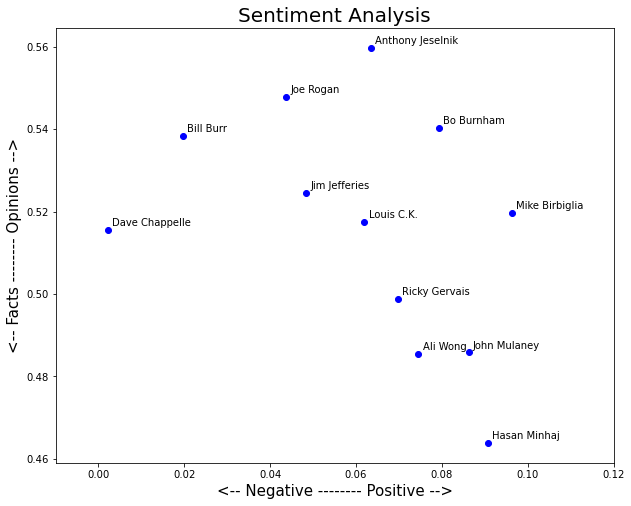

In [16]:
# Grafiquemos los resultados
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Rutina de Sentimiento a lo largo del tiempo

En lugar de mirar el sentimiento general, veamos si hay algo interesante sobre el sentimiento a lo largo del tiempo a lo largo de cada rutina.

In [17]:
# Divide cada rutina en 10 partes
import numpy as np
import math

def split_text(text, n=10):
    '''Toma una cadena de texto y la divide en n partes iguales, con un valor predeterminado de 10 partes iguales.'''

    # Calcule la longitud del texto, el tamaño de cada fragmento de texto y los puntos de inicio de cada fragmento de texto
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Extraiga fragmentos de texto del mismo tamaño y póngalos en una lista
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [18]:
# Echemos un vistazo a nuestros datos de nuevo
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.074543,0.485406
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.063377,0.559790
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.019663,0.538412
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.079319,0.540374
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,0.002237,0.515530
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.090763,0.463817
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.048405,0.524486
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.043783,0.547919
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.086227,0.485797
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.061908,0.517529


In [19]:
# Vamos a crear una lista para contener todas las piezas de texto
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go t

In [20]:
# La lista tiene 10 elementos, uno para cada transcripción.
len(list_pieces)

12

In [21]:
# Cada transcripción se ha dividido en 10 piezas de texto.
len(list_pieces[0])

10

In [22]:
# Calcular la polaridad de cada fragmento de texto

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.10982341269841271,
  0.07011794532627867,
  0.0676048790179225,
  0.1006832611832612,
  -0.042106537530266344,
  0.15212721992995432,
  0.03777319719753929,
  0.1122005091344714,
  0.01344817729351628,
  0.1130333951762523],
 [0.14813544856227787,
  -0.09501356852103121,
  -0.018946837994457046,
  0.03688446969696969,
  0.12692862692862691,
  0.1366996336996337,
  0.08488636363636365,
  0.004733198243836537,
  0.024391379230088904,
  0.16100133104443445],
 [-0.032260689190037016,
  0.003301963736746346,
  0.034964705969860614,
  0.01910127610885185,
  -0.04993463632077493,
  0.10210267356100688,
  0.01893112674362673,
  -0.03218448837868481,
  -0.013136173767752717,
  0.12456281947807374],
 [0.1738758288125377,
  -0.05915352957589287,
  -0.01911550065231571,
  0.040240860990860994,
  0.05460471222766305,
  -0.03846844293272864,
  0.03523965141612201,
  0.20398347760564992,
  0.2006024821952241,
  0.18819047619047616],
 [-0.05093449586407334,
  -0.05840336152622112,
  0.047563317908

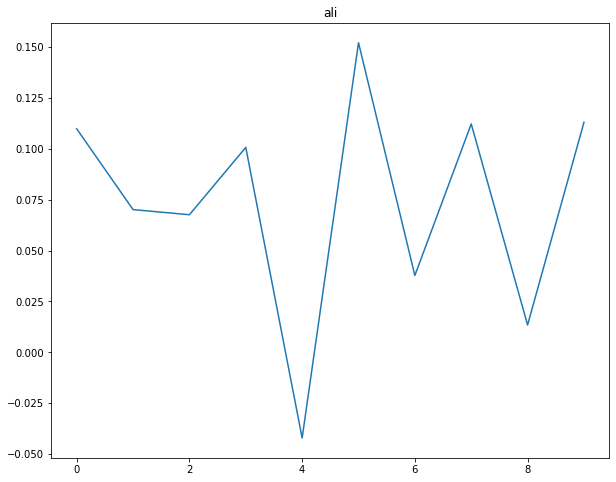

In [23]:
# Mostrar la trama de un comediante
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

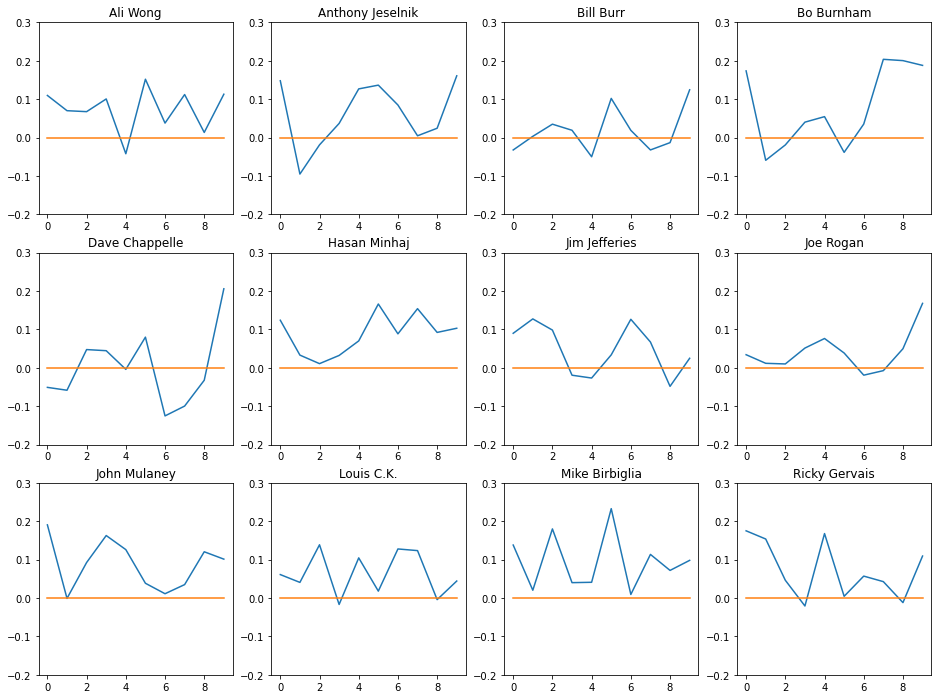

In [24]:
# Mostrar la trama para todos los comediantes
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(bottom=-.2, top=.3)
    
plt.show()

Ali Wong se mantiene generalmente positiva a lo largo de su rutina. Comediantes similares son Louis C.K. y Mike Birbiglia.

Por otro lado, aquí tienes algunos patrones bastante diferentes, como Bo Burnham, que se vuelve más feliz a medida que pasa el tiempo, y Dave Chappelle, que tiene algunos momentos bastante bajos en su rutina.